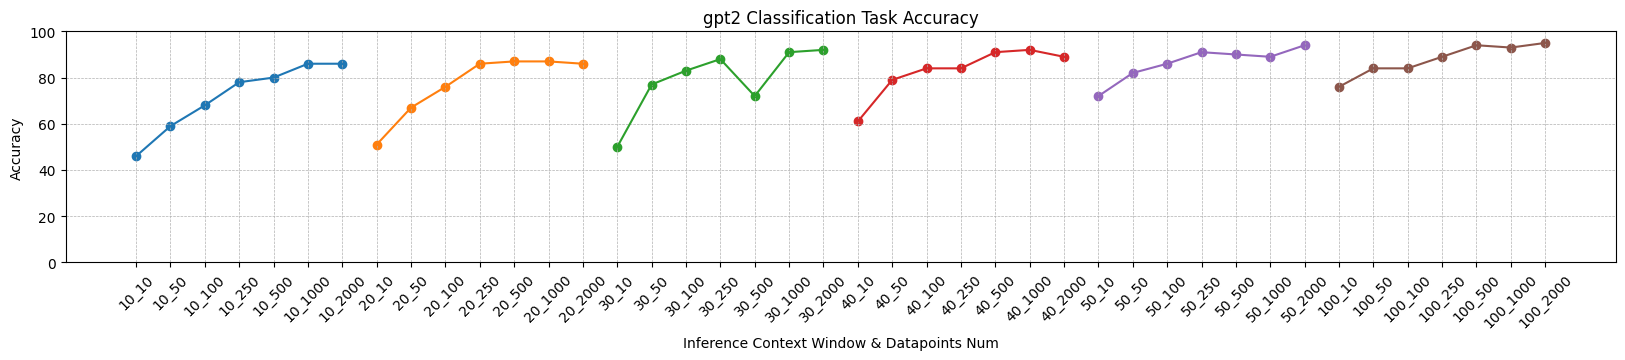

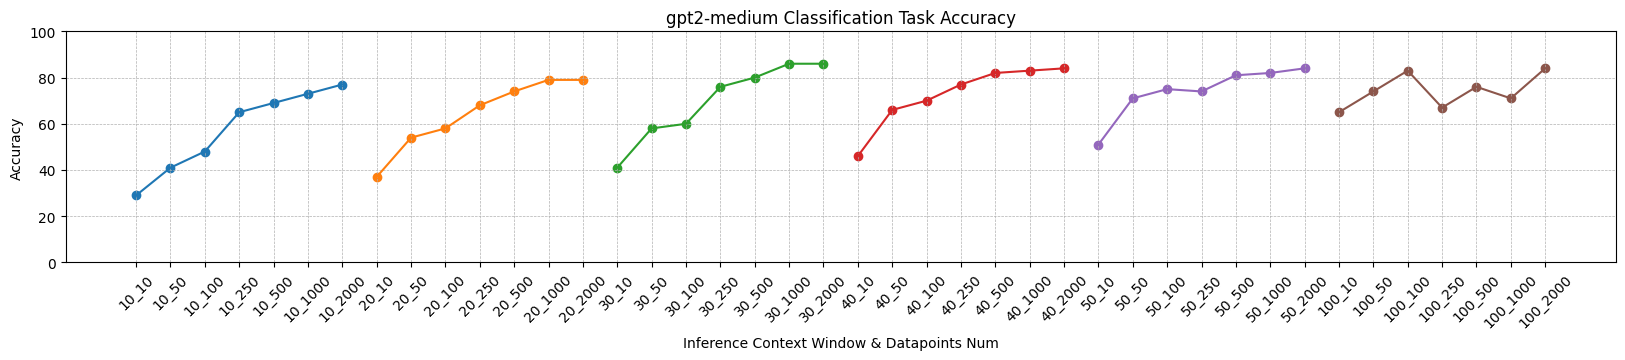

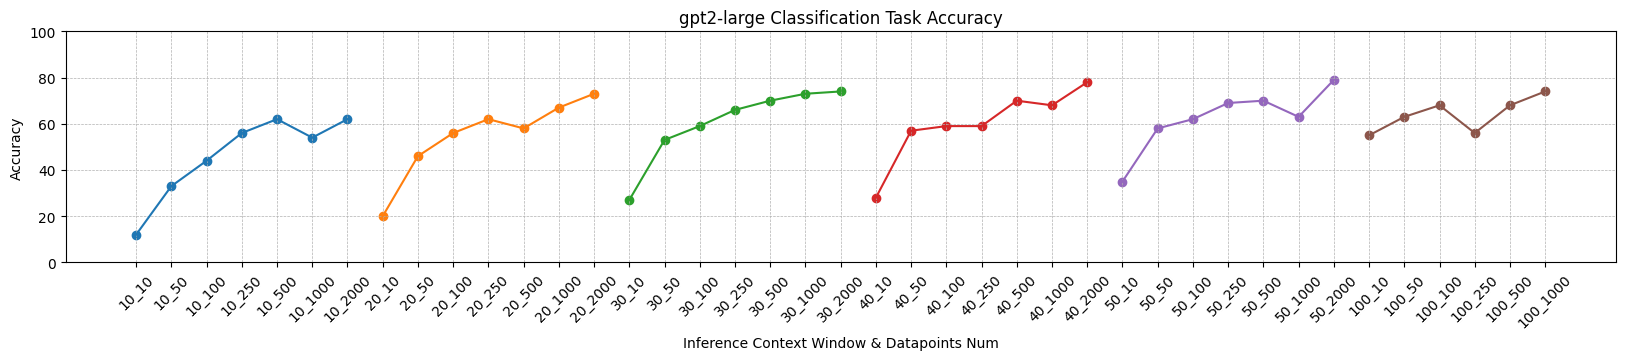

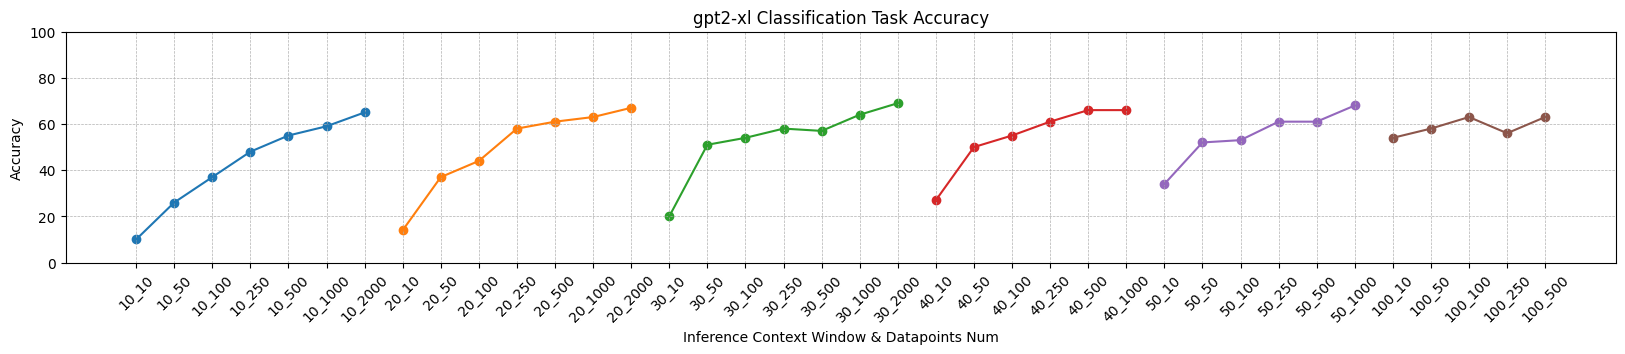

In [22]:
import os

ok_lines = {}

with open("./ok.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        model_name = tokens[5][1:-2]
        inference_max_len = tokens[7][:-1]
        datapoints_num = tokens[9][:-1]
        accuracy = tokens[1][2:4]

        if model_name not in ok_lines:
            ok_lines[model_name] = {}

        if ok_lines[model_name].get(inference_max_len) is None:
            ok_lines[model_name][inference_max_len] = {
                "x_labels": [],
                "y_labels": []
            }

        ok_lines[model_name][inference_max_len]["x_labels"].append(f"{inference_max_len}_{datapoints_num}")
        ok_lines[model_name][inference_max_len]["y_labels"].append(int(accuracy))

import matplotlib.pyplot as plt

for model_name in ok_lines:
    plt.figure(figsize=(20, 3))
    plt.xlabel("Inference Context Window & Datapoints Num")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Classification Task Accuracy")
    plt.xticks(rotation=45)
    plt.ylim(0,100)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    for inference_max_len in ok_lines[model_name]:
        plt.plot(ok_lines[model_name][inference_max_len]["x_labels"], ok_lines[model_name][inference_max_len]["y_labels"], label=f"Inference Max Len: {inference_max_len}")
        plt.scatter(ok_lines[model_name][inference_max_len]["x_labels"], ok_lines[model_name][inference_max_len]["y_labels"])

    